In [1]:
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import hopsworks
import pandas as pd

In [3]:
project = hopsworks.login()
fs = project.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/196758
Connected. Call `.close()` to terminate connection gracefully.


In [4]:
wine_df = pd.read_csv("https://raw.githubusercontent.com/ID2223KTH/id2223kth.github.io/master/assignments/lab1/wine.csv")
wine_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
wine_df['type'].value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

### Data Cleaning
* white: 4898 rows -> 4870 rows
* red: 1599 rows -> 1593 rows

#### Check the number of null values

In [7]:
wine_df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

#### Drop rows which contain null values

In [8]:
wine_df = wine_df.dropna()
wine_df['type'].value_counts()

type
white    4870
red      1593
Name: count, dtype: int64

### Exploratory Data Analysis (EDA)  our wine quality data

Let's look at our wine - the distribution and range of values for the 2 different types
 * fixed acidity
 * volatile acidity
 * citric acid
 * residual sugar
 * chlorides
 * free sulfur dioxide
 * total sulfur dioxide
 * density
 * pH
 * sulphates
 * alcohol
 * quality

 and the target variable is `quality`.

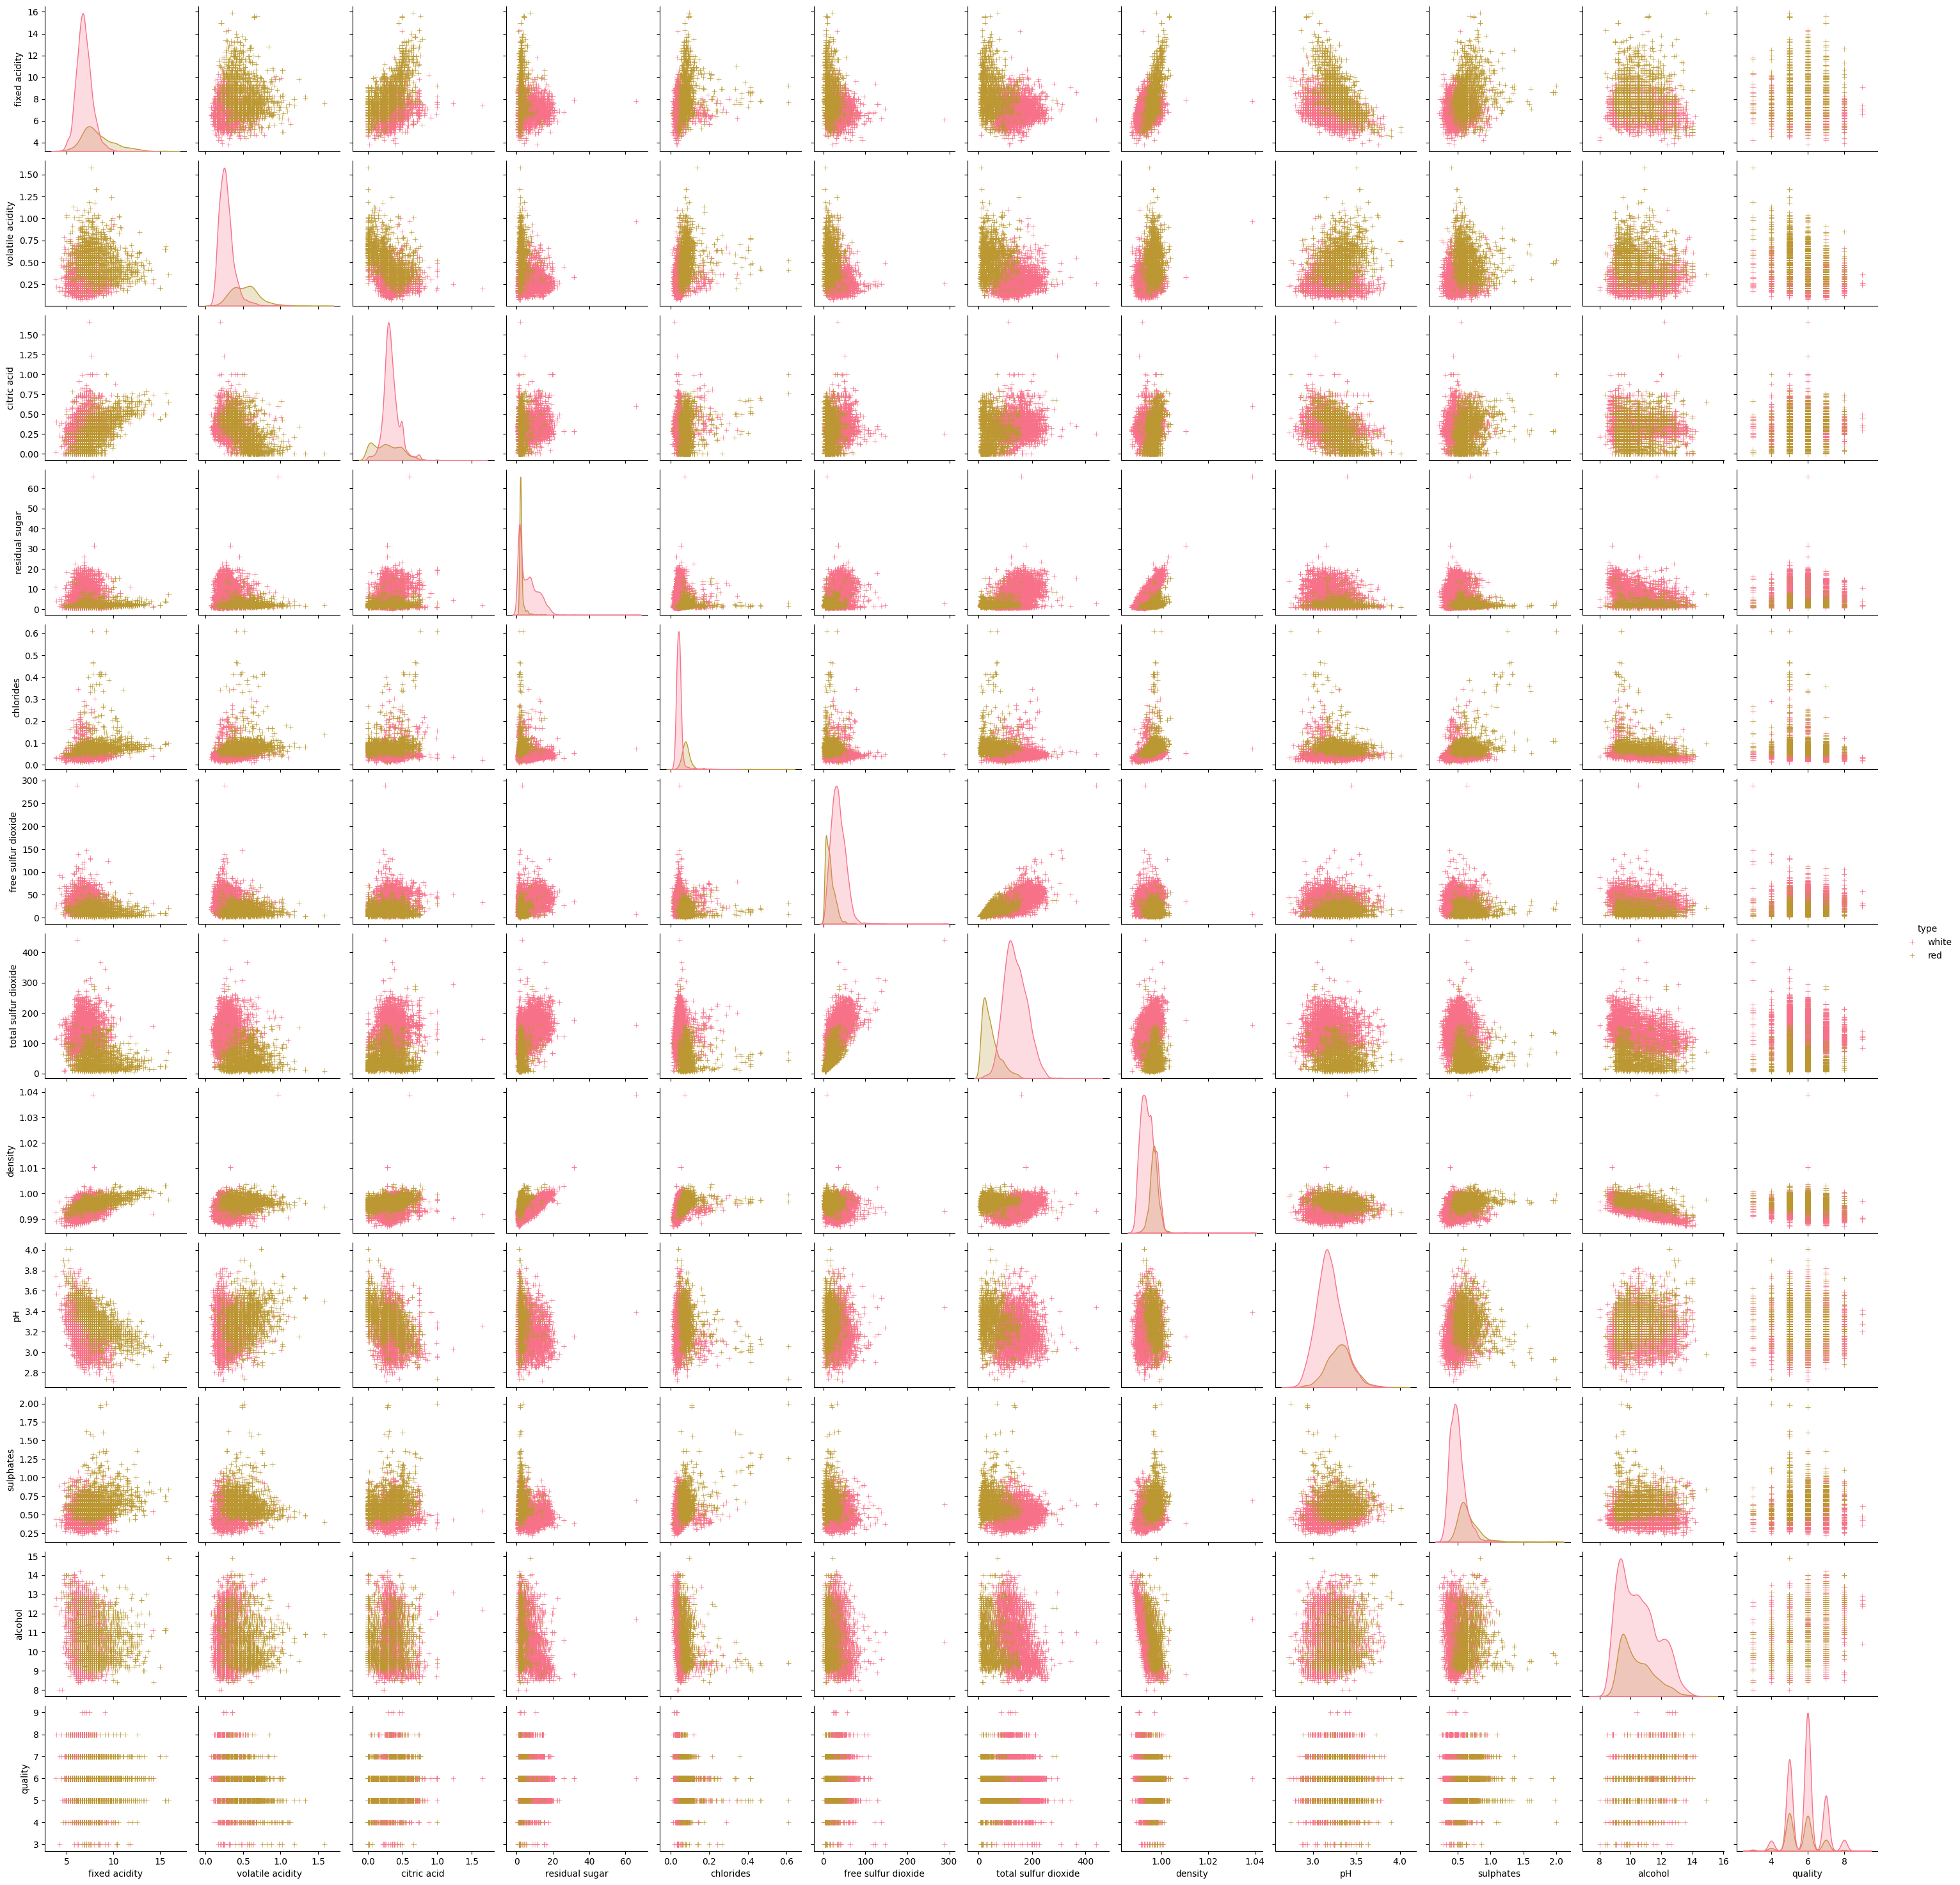

In [9]:
g = sns.pairplot(wine_df, hue='type', markers='+')
plt.show()

#### Find redundant features

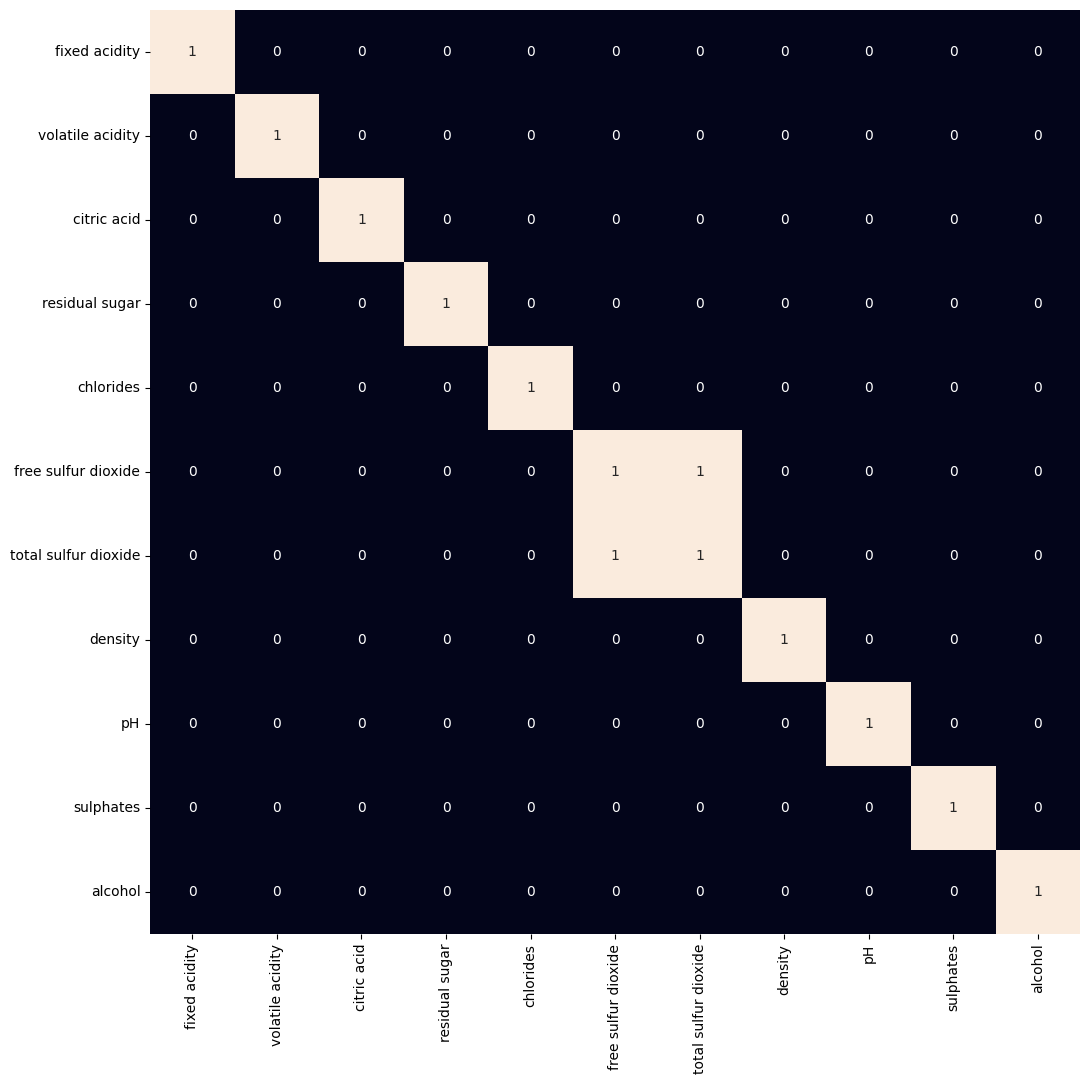

In [10]:
plt.figure(figsize=(12,12))
sns.heatmap(wine_df.drop(['type','quality'], axis=1).corr() > 0.7, annot=True, cbar=False)
plt.show()

The features of 'free sulphur dioxide' and 'total sulfur dioxide' are highly correlated so that we will remove 'total sulfur dioxide'.

In [11]:
wine_df = wine_df.drop('total sulfur dioxide', axis=1)
wine_df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,5


### Visualize range of values 

We want to design a simulator generate the 2 types of wine (white wine and red wine).
To do this, we can visualize the range of values for fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, density, pH, sulphates, alcohol, and quality for each of the 2 wines.

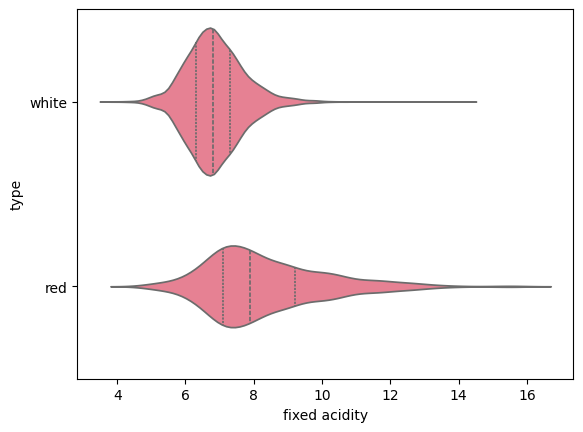

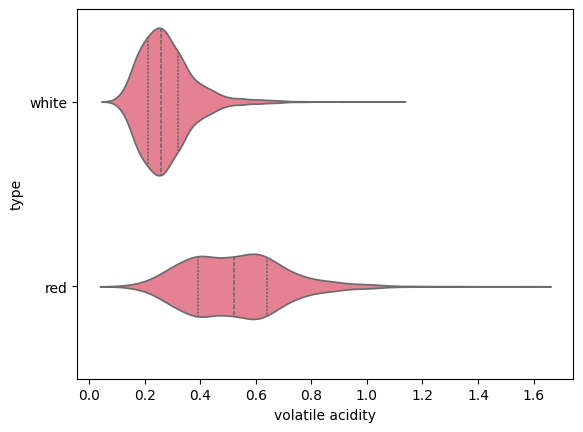

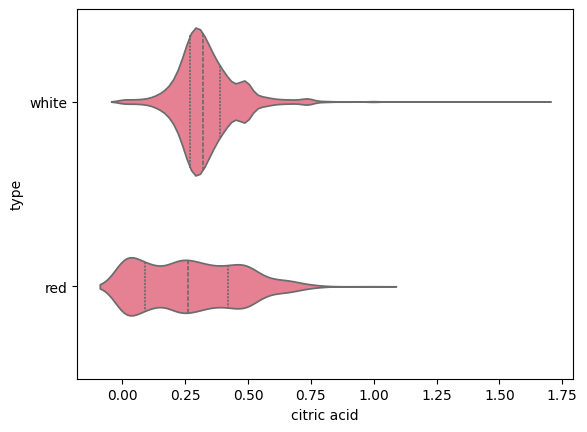

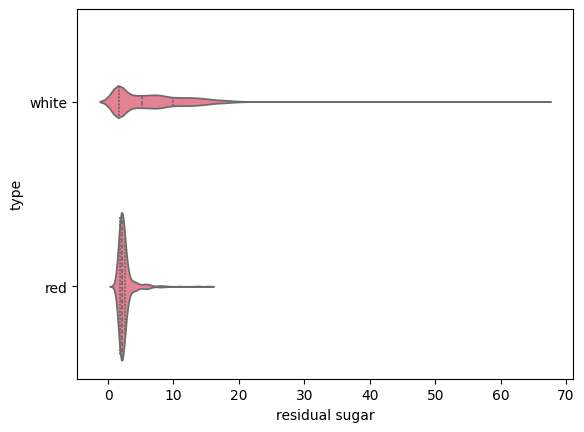

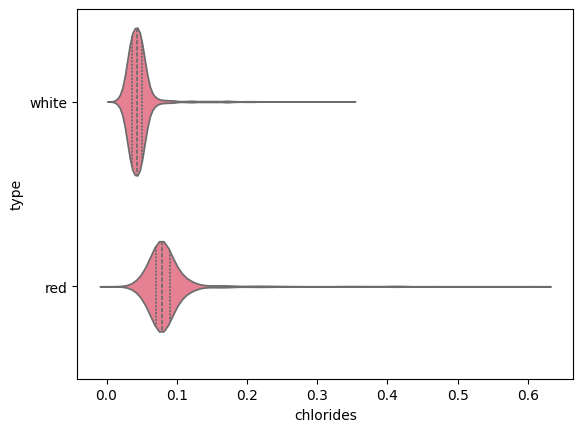

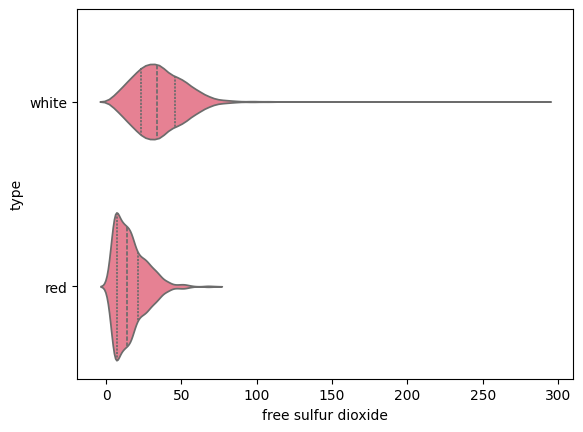

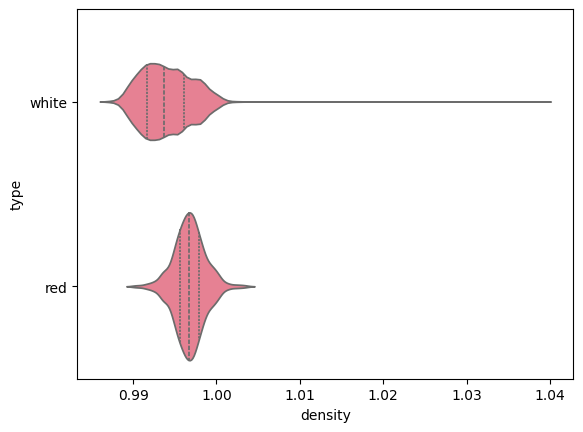

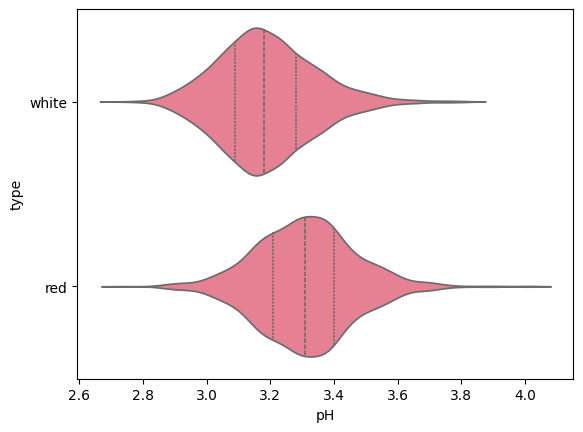

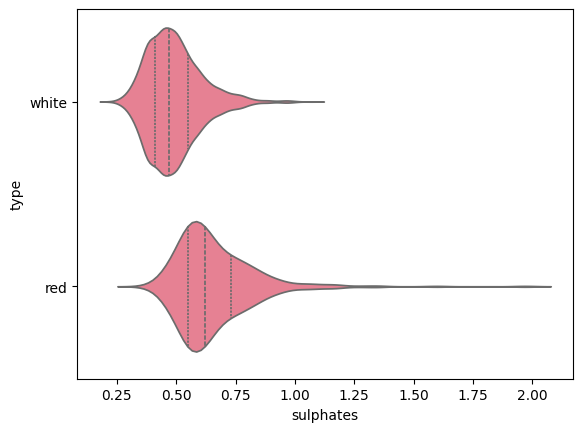

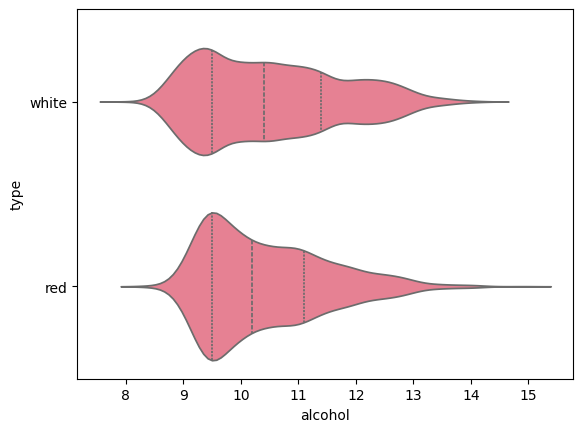

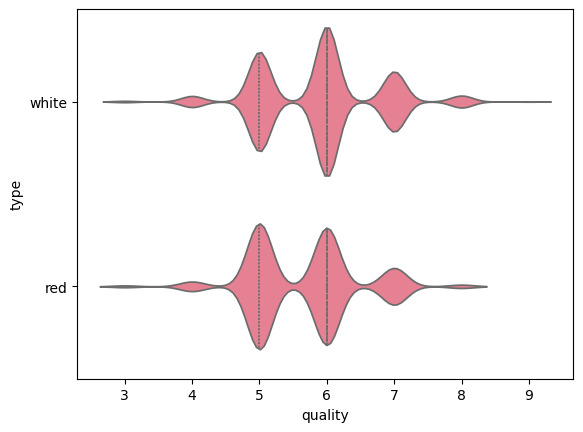

In [12]:
column_list = list(wine_df.drop('type', axis=1).columns)
for column in column_list:
    g = sns.violinplot(y='type', x=column, data=wine_df, inner='quartile')
    plt.show()

### Insert our wine DataFrame into a FeatureGroup
Let's write our historical wine feature values and labels to a feature group.
When you write historical data, this process is called `backfilling`.

In [13]:
wine_df.columns = [col.replace(' ', '_').lower() for col in wine_df.columns]
wine_df.columns

Index(['type', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'density', 'ph',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [14]:
feature_columns = list(wine_df.drop(['type','quality'], axis=1).columns)
wine_fg = fs.get_or_create_feature_group(
    name="wine",
    version=1,
    primary_key=feature_columns, 
    description="wine quality dataset")
wine_fg.insert(wine_df)

Uploading Dataframe: 0.00% |          | Rows 0/6463 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: wine_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/196758/jobs/named/wine_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x20b917896c0>, None)

### Data Validation
If you want, you can enable data validation for your feature group.
The code below will prevent wine quality data from being written your your feature group if you write values outside the expected ranges.

In [15]:
from great_expectations.core import ExpectationSuite, ExpectationConfiguration

def expect(suite, column, min_val, max_val):
    suite.add_expectation(
    ExpectationConfiguration(
        expectation_type="expect_column_values_to_be_between",
        kwargs={
            "column":column, 
            "min_value":min_val,
            "max_value":max_val,
        }
    )
)

In [18]:
stat_list = []
for col in list(wine_df.drop('type', axis=1).columns):
    stat_tuple = (col, wine_df[col].min(), wine_df[col].max())
    stat_list.append(stat_tuple)

stat_list

[('fixed_acidity', 3.8, 15.9),
 ('volatile_acidity', 0.08, 1.58),
 ('citric_acid', 0.0, 1.66),
 ('residual_sugar', 0.6, 65.8),
 ('chlorides', 0.009, 0.611),
 ('free_sulfur_dioxide', 1.0, 289.0),
 ('density', 0.98711, 1.03898),
 ('ph', 2.72, 4.01),
 ('sulphates', 0.22, 2.0),
 ('alcohol', 8.0, 14.9),
 ('quality', 3, 9)]

In [17]:
suite = ExpectationSuite(expectation_suite_name="wine_dimensions")
for tuple in stat_list:
    expect(suite, tuple[0], tuple[1], tuple[2])

wine_fg.save_expectation_suite(expectation_suite=suite, validation_ingestion_policy="STRICT")

Attached expectation suite to Feature Group, edit it at https://c.app.hopsworks.ai:443/p/196758/fs/196677/fg/230790
